### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Inference
- The dataset has no Null Values

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the unique values of select columns

In [7]:
print('Unique values of seasons are {}'.format(df.season.unique()))
print('Unique values of yr are {}'.format(df.yr.unique()))
print('Unique values of mnth are {}'.format(df.mnth.unique()))
print('Unique values of weekday are {}'.format(df.weekday.unique()))
print('Unique values of workingday are {}'.format(df.workingday.unique()))
print('Unique values of holiday are {}'.format(df.holiday.unique()))
print('Unique values of weathersit are {}'.format(df.weathersit.unique()))

Unique values of seasons are [1 2 3 4]
Unique values of yr are [0 1]
Unique values of mnth are [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values of weekday are [6 0 1 2 3 4 5]
Unique values of workingday are [0 1]
Unique values of holiday are [0 1]
Unique values of weathersit are [2 1 3]


### Inference
- From the data dictionary, we already know that the above variables are categorical variables.
- We need to replace the numbers with the categories of
    - season
    - weekday
    - month
    - weathersit

### We will use the mapping based on the data dictionary provided

In [9]:
df['season'] = df.season.map({1:'spring', 2:'summer', 3:'fall',4:'winter'})
df['weekday'] = df.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}) 
df['mnth'] = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:"sept",10:'oct',11:'nov',12:'dec'})
df['yr'] = df.yr.map({0:'2018',1:'2019'})
df['weathersit'] = df.weathersit.map({1:'partly_cloudy', 2:'mist',3:'light_rain_or_snow',4:'heavy_rain'})

### Removing redundant columns
1. dteday - As all the required information from date field has been extracted, we can remove this column
2. casual - This is a classification of the total users, its wont be useful for predicion and hence is being removed.
3. registered - This is a classification of the total users, it wont be useful for prediction and hence is being removed.
4. instant - This variable is an index for the dataset, hence can be dropped`

In [10]:
df.drop(['instant','dteday', 'casual', 'registered'], inplace=True, axis=1)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,monday,1,partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tuesday,1,partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wednesday,1,partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

<AxesSubplot:>

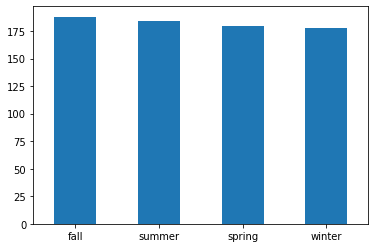

In [12]:
df.season.value_counts().plot(kind='bar', rot=0)

<AxesSubplot:>

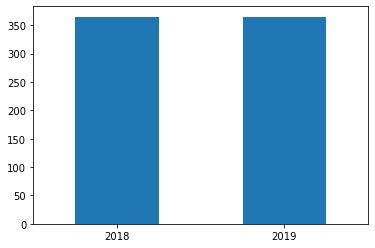

In [13]:
df.yr.value_counts().plot(kind='bar', rot=0)

<AxesSubplot:>

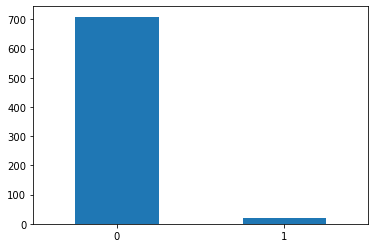

In [14]:
df.holiday.value_counts().plot(kind='bar', rot=0)

<AxesSubplot:xlabel='yr,holiday'>

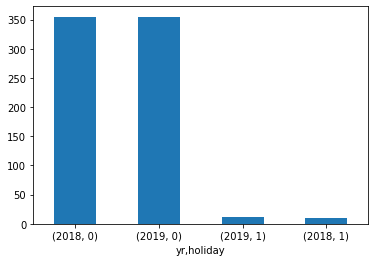

In [15]:
df[['yr','holiday']].value_counts().plot(kind='bar', rot=0)

<AxesSubplot:>

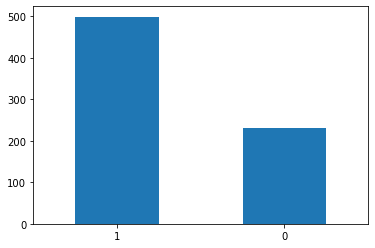

In [16]:
df.workingday.value_counts().plot(kind='bar', rot=0)

<AxesSubplot:xlabel='yr,workingday'>

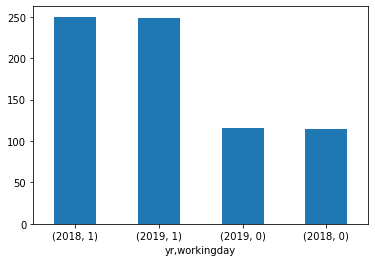

In [18]:
df[['yr','workingday']].value_counts().plot(kind='bar', rot=0)

### Inference
1. There are 10 holidays in both years.
2. There are 115 Non-working days.
3. Based on the info provided in the data dictionary, weekends are have 0 in working day but are not marked as holiday.

In [19]:
df[['holiday', 'workingday']].value_counts()

holiday  workingday
0        1             499
         0             210
1        0              21
dtype: int64

### Checking for outliers

<AxesSubplot:>

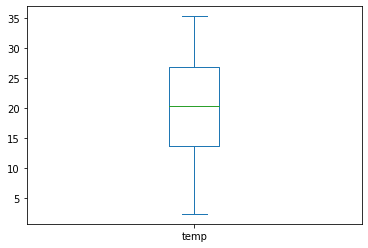

In [20]:
df['temp'].plot(kind='box')

<AxesSubplot:>

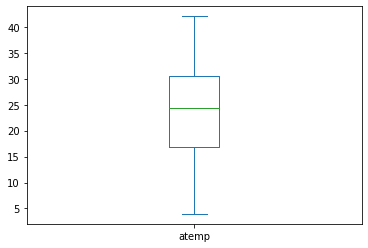

In [21]:
df['atemp'].plot(kind='box')

In [22]:
df[df.hum<20]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,spring,2018,feb,0,saturday,0,partly_cloudy,16.365847,19.5702,18.7917,34.000021,1635
68,spring,2018,mar,0,thursday,1,light_rain_or_snow,15.952731,19.2834,0.0000,17.545759,623


C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum', ylabel='cnt'>

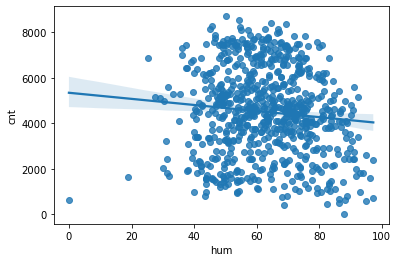

In [23]:
sns.regplot(df.hum, df.cnt)

In [24]:
df = df[df.hum>20]

<AxesSubplot:>

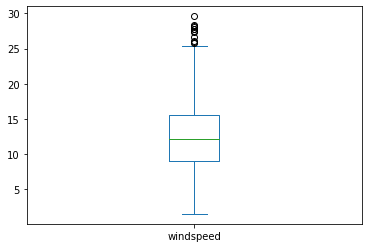

In [25]:
df['windspeed'].plot(kind='box')

In [26]:
df[df.windspeed>25]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
44,spring,2018,feb,0,monday,1,partly_cloudy,17.015000,19.91750,37.5833,27.999836,1913
93,summer,2018,apr,0,monday,1,partly_cloudy,23.506653,27.14645,42.6250,25.833257,3115
94,summer,2018,apr,0,tuesday,1,mist,16.980847,19.91750,64.2083,26.000489,1795
238,fall,2018,aug,0,saturday,0,mist,27.880000,31.77780,85.0000,25.166339,1115
292,winter,2018,oct,0,thursday,1,partly_cloudy,19.509153,23.32625,63.6250,28.292425,4195
377,spring,2019,jan,0,friday,1,partly_cloudy,11.240847,12.46810,50.7500,25.333236,3214
382,spring,2019,jan,0,wednesday,1,partly_cloudy,12.436653,13.76270,44.3333,27.833743,3376
407,spring,2019,feb,0,sunday,0,partly_cloudy,5.227500,5.08290,46.4583,27.417204,1529
420,spring,2019,feb,0,saturday,0,partly_cloudy,11.924153,12.78375,39.5833,28.250014,2732
431,spring,2019,mar,0,thursday,1,partly_cloudy,21.627500,26.23020,56.7500,29.584721,5382


- As there are many data points that are outliers to the data, we cannot remove them. These need to be treated. Hence we will be imputing them with the max value of inter quartile range


In [28]:
lower_quartile = df.windspeed.quantile(0.25)
upper_quartile = df.windspeed.quantile(0.75)
iqr = upper_quartile-lower_quartile
min_windspeed_val = lower_quartile-iqr*1.5
max_windspeed_val = upper_quartile+iqr*1.5
print("minimum value of windspeed: ",min_windspeed_val)
print("maximum value of windspeed: ", max_windspeed_val)

minimum value of windspeed:  -0.8584374999999991
maximum value of windspeed:  25.514638499999997


C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

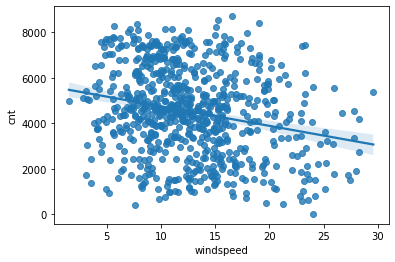

In [29]:
sns.regplot(df.windspeed, df.cnt)

In [30]:
df.loc[df.windspeed>max_windspeed_val, 'windspeed'] = max_windspeed_val

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

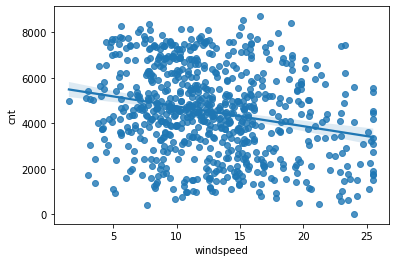

In [31]:
sns.regplot(df.windspeed, df.cnt)

- Based on the imputation results and regression plots, we can say that imputation did not lead to high change in the relationship with the target variable.

### Bivariate Analysis

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

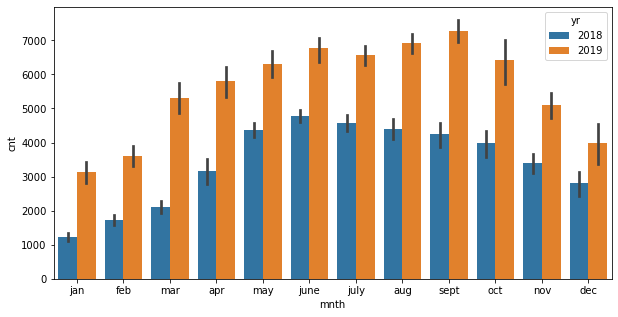

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='mnth', y='cnt',hue='yr', data = df)

- Based on the mapping, we can clearly say that the demand rises as the year progresses from jan to july, and again falls by the end of the year i.e, in Nov and dec.
- Also, we can clearly see that the demand has increased from 2018 to 2019
- At the same time seasonality of demand can also be seen in the above chart.

<AxesSubplot:xlabel='season', ylabel='cnt'>

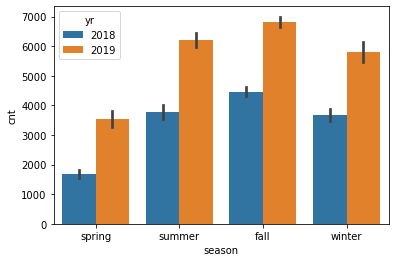

In [33]:
sns.barplot(x='season', y='cnt',hue='yr', data = df)

- Based on the above graph, we can say that the demand rises in summer and fall season while the demand is low in spring season.
- Also, similar to previous chart, we can see the seasonal nature of the demand as the pattern is similar for both the years.

<AxesSubplot:xlabel='cnt', ylabel='season'>

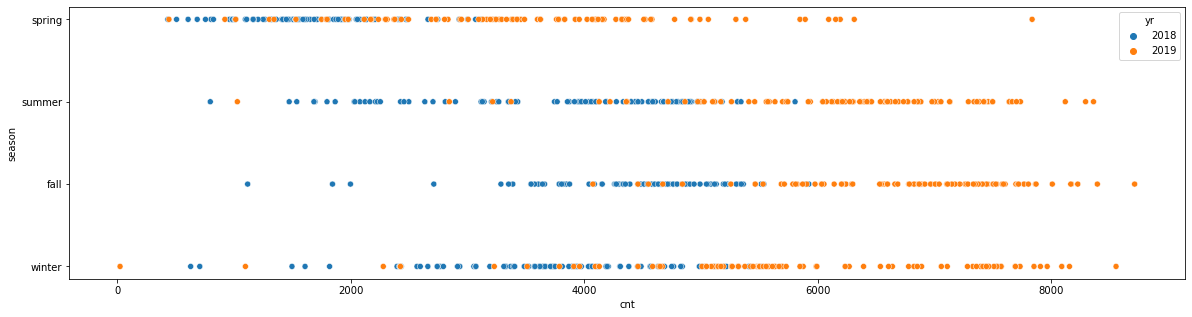

In [34]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='cnt', y='season', hue='yr',data=df)

- This scatter plot shows the distribution of data points across seasons. We can see here that there are a few data points which have unusual numbers like the demand in wither for one of the data point is 0. We need to validate such data points.

<AxesSubplot:xlabel='cnt', ylabel='weathersit'>

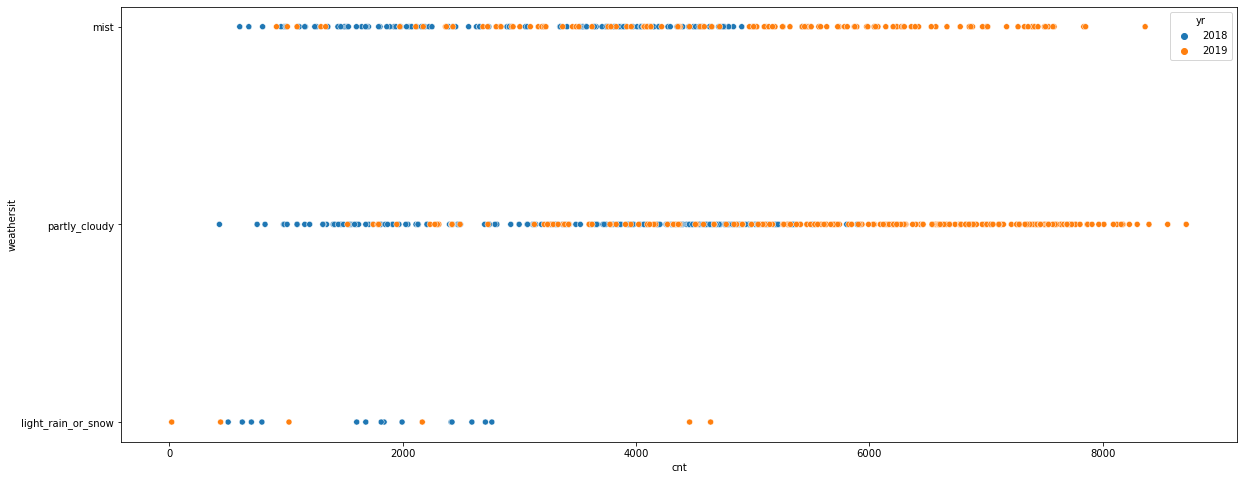

In [35]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='cnt', y='weathersit', hue='yr',data=df)

- The number of datapoints in light_rain_or_snow category of weathersit is less as compared to the other 2 categories.

## Building model

#### One Hot Encoding for Categorical variables

In [39]:
df_ohe = pd.get_dummies(df)

In [40]:
df_ohe.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'yr_2018', 'yr_2019', 'mnth_apr', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_friday', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_light_rain_or_snow',
       'weathersit_mist', 'weathersit_partly_cloudy'],
      dtype='object')

In [41]:
df_ohe.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_friday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain_or_snow,weathersit_mist,weathersit_partly_cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
### Checking for variables with multi-collinearity
m = ~(df_ohe.corr().mask(np.eye(len(df_ohe.corr()), dtype=bool)).abs() > 0.75).any()
raw = df_ohe.corr().loc[m, m]

In [43]:
multicollinear_vars = list(filter(lambda i: i not in list(raw.index),list(df_ohe.corr().index)))
multicollinear_vars.append('cnt')

In [44]:
multicollinear_vars

['temp',
 'atemp',
 'yr_2018',
 'yr_2019',
 'weathersit_mist',
 'weathersit_partly_cloudy',
 'cnt']

In [45]:
df_for_heatmap = df_ohe.corr().loc[multicollinear_vars,multicollinear_vars]

<AxesSubplot:>

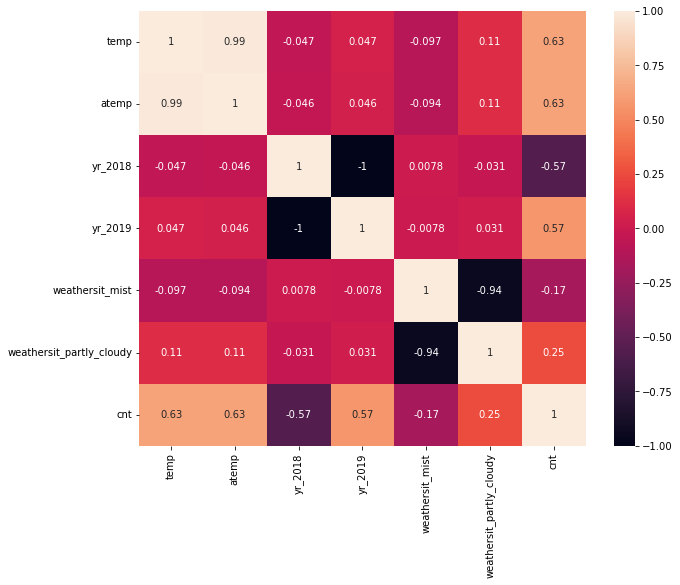

In [46]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.heatmap(df_for_heatmap, annot=True)

## Dropping high correlation variables
- As we can see that (temp, atemp), (yr_2018,yr_2019), ('weather_mist', weather_partly_cloudy) are the pairs that are highly correlated. We can drop one of these variables to reduce multicollinearity.
- Hence we will be dropping temp, yr_2018, weather_mist because we intend to keep the variables with better correlation with the target variable

In [47]:
df_ohe.drop(['temp', 'yr_2018', 'weathersit_mist'], axis=1,inplace=True)

In [48]:
df_ohe.head()

,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,...,mnth_sept,weekday_friday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain_or_snow,weathersit_partly_cloudy
0,0,0,18.18125,80.5833,10.749882,985,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,11.46350,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


#### imports for model building

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
df_temp = df_ohe.copy()

In [51]:
def split_data(data):
    target = data[['cnt']]
    data.drop('cnt', axis=1, inplace=True)
    train_data = data

    X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=23)
    return X_train, X_test, y_train, y_test

In [52]:
### Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = split_data(df_temp)

In [53]:
### Normalising the colums

scaler = MinMaxScaler()

var_list = ['atemp', 'hum', 'windspeed']

X_train[var_list] = scaler.fit_transform(X_train[var_list])

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [54]:
X_train = sm.add_constant(X_train)

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Feature selection
- By checking the p-values of the model, we have recursively dropped the variables one by one whose p-value was greater than 0.05

In [55]:
def check_vif(train_data):
    X_train_new = train_data.drop(['const'],axis=1)
    vif = pd.DataFrame()
    X = X_train_new
    vif["features"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    
    return vif.sort_values(by='VIF', ascending=False)

In [56]:
def drop_column_and_rebuild(train_data, column_name_list):
    X_train = train_data.drop(column_name_list, axis=1)
    lm = sm.OLS(y_train, X_train).fit()

    return lm.summary(), X_train, lm

In [57]:
lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.90e-208
Time:                        21:35:11   Log-Likelihood:                -4681.4
No. Observations:                 582   AIC:                             9419.
Df Residuals:                     554   BIC:                             9541.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1424.1776    149.921      9.500      0.000    1129.695    1718.660
holiday                          42.3577    145.589      0.291      0.771    -243.616     328.331
workingday                      470.0733     69.136      6.799      0.000     334.273     605.874
atemp                          3497.1874    358.302      9.760      0.000    2793.390    4200.984
hum                            -922.8081    249.074     -3.705      0.000   -1412.053    -433.563
windspeed                      -989.5749    167.458     -5.909      0.000   -1318.506    -660.644
season_fall                     347.4454    147.961      2.348      0.019      56.812     638.079
season_spring                  -526.3232    132.104     -3.984      0.000    -785.809    -266.837
season_summer                   371.7700    135.278      2.748      0.006     106.049     637.491
season_winter                  1231.2853    141.466      8.704      0.000     953.409    1509.161
yr_2019                        2021.5727     66.063     30.600      0.000    1891.807    2151.338
mnth_apr                        264.5114    169.810      1.558      0.120     -69.039     598.062
mnth_aug                        283.3936    189.294      1.497      0.135     -88.428     655.215
mnth_dec                       -438.2628    154.684     -2.833      0.005    -742.101    -134.424
mnth_feb                        -52.4961    179.986     -0.292      0.771    -406.034     301.042
mnth_jan                       -221.0984    192.561     -1.148      0.251    -599.337     157.141
mnth_july                      -175.4783    201.537     -0.871      0.384    -571.348     220.391
mnth_june                       364.2921    168.940      2.156      0.031      32.450     696.134
mnth_mar                        400.9179    137.878      2.908      0.004     130.091     671.745
mnth_may                        572.7260    177.704      3.223      0.001     223.669     921.783
mnth_nov                       -491.9914    182.496     -2.696      0.007    -850.460    -133.523
mnth_oct                        120.7830    172.544      0.700      0.484    -218.137     459.703
mnth_sept                       796.8804    154.673      5.152      0.000     493.062    1100.699
weekday_friday                  221.2923     79.067      2.799      0.005      65.984     376.601
weekday_monday                  -82.3870     78.842     -1.045      0.296    -237.252      72.478
weekday_saturday                671.3054     85.639      7.839      0.000     503.088     839.523
weekday_sunday                  240.4411     86.749      2.772      0.006      70.043     410.839
weekday_thursday                153.2302     80.800      1.896      0.058      -5.481     311.942
weekday_tuesday                 102.6711     

In [58]:
check_vif(X_train)

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,holiday,inf
1,workingday,inf
28,weekday_wednesday,inf
27,weekday_tuesday,inf
26,weekday_thursday,inf
25,weekday_sunday,inf
24,weekday_saturday,inf
23,weekday_monday,inf
22,weekday_friday,inf
21,mnth_sept,inf


### Steps for feature selection

- The summary gives coefficients and p-values for each of the variable
- We calculate VIF for the the variables, to see if there is higher correlation i.e., if 1 variable is able to explain more variance compared to other variables.
- We remove variables with p-value greater than 0.05
- We remove variables with VIF greater than 5.

#### This is carried out in the following manner.
- We check if the p-value and vif both are above the threshold and remove these variables first.
- We run the re-build the model after removing each variable. This changes the value of VIF as well as p-values.
- We check if we have high vif and high p-value variables are remove them. 
    - if not, then we look for variables with high p-value even if the VIF is low. We remove these variables next.
    - Repeating the above steps till those category variables are exahusted.
    - Now we remove variables with Low p-value but High VIF, and check if there is any improvement in the model metrics.
- We repeat these steps recursively for every variable. Till we arrive at a satisfactory solution.

- The below list has been prepared by carrying out the above process of feature selection

In [60]:
result, X_train, lm = drop_column_and_rebuild(X_train, ['holiday', 'mnth_feb','weekday_monday',"mnth_july","mnth_jan","weekday_sunday","weekday_tuesday",'weekday_wednesday',"weekday_thursday","weekday_friday",'mnth_oct','mnth_apr'])
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          9.80e-215
Time:                        21:43:07   Log-Likelihood:                -4688.6
No. Observations:                 582   AIC:                             9415.
Df Residuals:                     563   BIC:                             9498.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1572.3857    192.429      8.171      0.000    1194.420    1950.351
workingday                      372.4490     86.225      4.320      0.000     203.087     541.811
atemp                          3559.9365    296.615     12.002      0.000    2977.330    4142.543
hum                            -937.7113    245.178     -3.825      0.000   -1419.286    -456.137
windspeed                      -966.4832    166.781     -5.795      0.000   -1294.073    -638.894
season_fall                     271.9206    127.090      2.140      0.033      22.293     521.549
season_spring                  -573.4323     87.258     -6.572      0.000    -744.823    -402.042
season_summer                   556.4645     89.655      6.207      0.000     380.366     732.563
season_winter                  1317.4329     93.043     14.159      0.000    1134.680    1500.186
yr_2019                        2015.2892     66.063     30.505      0.000    1885.528    2145.050
mnth_aug                        372.6171    145.276      2.565      0.011      87.268     657.966
mnth_dec                       -434.4691    132.585     -3.277      0.001    -694.891    -174.048
mnth_june                       302.0096    145.358      2.078      0.038      16.499     587.521
mnth_mar                        396.6695    126.333      3.140      0.002     148.528     644.811
mnth_may                        424.4158    150.587      2.818      0.005     128.635     720.197
mnth_nov                       -535.6404    150.517     -3.559      0.000    -831.284    -239.997
mnth_sept                       849.3061    141.595      5.998      0.000     571.187    1127.425
weekday_saturday                469.7917    114.795      4.092      0.000     244.312     695.271
weathersit_light_rain_or_snow -1626.3127    223.357     -7.281      0.000   -2065.028   -1187.598
weathersit_partly_cloudy        473.9349     88.317      5.366      0.000     300.465     647.405
==============================================================================
Omnibus:                      100.587   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.489
Skew:                          -0.821   Prob(JB):                     7.61e-67
Kurtosis:                       6.140   Cond. No.                     6.72e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
check_vif(X_train)

,features,VIF
4,season_fall,20.82
7,season_winter,15.80
6,season_summer,15.42
5,season_spring,11.73
1,atemp,4.13
2,hum,2.17
13,mnth_may,1.75
18,weathersit_partly_cloudy,1.74
14,mnth_nov,1.66
9,mnth_aug,1.60


In [62]:
result, X_train, lm = drop_column_and_rebuild(X_train, ['season_fall'])
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          9.80e-215
Time:                        21:43:31   Log-Likelihood:                -4688.6
No. Observations:                 582   AIC:                             9415.
Df Residuals:                     563   BIC:                             9498.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1844.3063    288.951      6.383      0.000    1276.752    2411.860
workingday                      372.4490     86.225      4.320      0.000     203.087     541.811
atemp                          3559.9365    296.615     12.002      0.000    2977.330    4142.543
hum                            -937.7113    245.178     -3.825      0.000   -1419.286    -456.137
windspeed                      -966.4832    166.781     -5.795      0.000   -1294.073    -638.894
season_spring                  -845.3529    180.868     -4.674      0.000   -1200.612    -490.094
season_summer                   284.5439    145.682      1.953      0.051      -1.604     570.691
season_winter                  1045.5122    144.288      7.246      0.000     762.104    1328.920
yr_2019                        2015.2892     66.063     30.505      0.000    1885.528    2145.050
mnth_aug                        372.6171    145.276      2.565      0.011      87.268     657.966
mnth_dec                       -434.4691    132.585     -3.277      0.001    -694.891    -174.048
mnth_june                       302.0096    145.358      2.078      0.038      16.499     587.521
mnth_mar                        396.6695    126.333      3.140      0.002     148.528     644.811
mnth_may                        424.4158    150.587      2.818      0.005     128.635     720.197
mnth_nov                       -535.6404    150.517     -3.559      0.000    -831.284    -239.997
mnth_sept                       849.3061    141.595      5.998      0.000     571.187    1127.425
weekday_saturday                469.7917    114.795      4.092      0.000     244.312     695.271
weathersit_light_rain_or_snow -1626.3127    223.357     -7.281      0.000   -2065.028   -1187.598
weathersit_partly_cloudy        473.9349     88.317      5.366      0.000     300.465     647.405
==============================================================================
Omnibus:                      100.587   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.489
Skew:                          -0.821   Prob(JB):                     7.61e-67
Kurtosis:                       6.140   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
check_vif(X_train)

,features,VIF
1,atemp,16.54
2,hum,14.60
3,windspeed,5.77
4,season_spring,4.59
0,workingday,4.58
17,weathersit_partly_cloudy,4.17
6,season_winter,3.93
5,season_summer,3.92
7,yr_2019,2.14
12,mnth_may,1.85


In [64]:
result, X_train, lm = drop_column_and_rebuild(X_train, ['atemp'])
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.98e-188
Time:                        21:43:50   Log-Likelihood:                -4754.9
No. Observations:                 582   AIC:                             9546.
Df Residuals:                     564   BIC:                             9624.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3926.6692    258.709     15.178      0.000    3418.518    4434.820
workingday                      395.2235     96.519      4.095      0.000     205.643     584.804
hum                            -178.7170    265.225     -0.674      0.501    -699.667     342.233
windspeed                     -1049.4881    186.577     -5.625      0.000   -1415.958    -683.018
season_spring                 -2476.3141    133.642    -18.530      0.000   -2738.810   -2213.818
season_summer                  -623.6789    139.382     -4.475      0.000    -897.450    -349.908
season_winter                   151.7015    138.370      1.096      0.273    -120.083     423.486
yr_2019                        2130.9290     73.177     29.120      0.000    1987.196    2274.662
mnth_aug                        327.6596    162.605      2.015      0.044       8.275     647.044
mnth_dec                       -833.6153    143.703     -5.801      0.000   -1115.874    -551.356
mnth_june                       823.8264    155.300      5.305      0.000     518.789    1128.864
mnth_mar                        478.6894    141.242      3.389      0.001     201.264     756.115
mnth_may                        828.7426    164.332      5.043      0.000     505.965    1151.520
mnth_nov                      -1029.2516    162.114     -6.349      0.000   -1347.672    -710.831
mnth_sept                       675.2286    157.704      4.282      0.000     365.470     984.987
weekday_saturday                470.5917    128.531      3.661      0.000     218.133     723.050
weathersit_light_rain_or_snow -1892.2940    248.849     -7.604      0.000   -2381.077   -1403.511
weathersit_partly_cloudy        703.9657     96.527      7.293      0.000     514.369     893.563
==============================================================================
Omnibus:                       73.216   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.619
Skew:                          -0.565   Prob(JB):                     3.41e-53
Kurtosis:                       5.947   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
check_vif(X_train)

,features,VIF
1,hum,7.09
2,windspeed,5.32
0,workingday,4.35
4,season_summer,3.52
5,season_winter,3.48
3,season_spring,2.94
16,weathersit_partly_cloudy,2.71
6,yr_2019,2.00
11,mnth_may,1.81
14,weekday_saturday,1.71


In [66]:
result, X_train, lm = drop_column_and_rebuild(X_train, ['hum'])
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     146.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.05e-189
Time:                        21:44:07   Log-Likelihood:                -4755.1
No. Observations:                 582   AIC:                             9544.
Df Residuals:                     565   BIC:                             9618.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3794.2419    168.165     22.563      0.000    3463.937    4124.547
workingday                      397.4068     96.418      4.122      0.000     208.026     586.788
windspeed                     -1019.0458    180.937     -5.632      0.000   -1374.437    -663.655
season_spring                 -2469.9488    133.243    -18.537      0.000   -2731.661   -2208.237
season_summer                  -620.4530    139.232     -4.456      0.000    -893.929    -346.977
season_winter                   144.0756    137.840      1.045      0.296    -126.666     414.817
yr_2019                        2136.7651     72.628     29.421      0.000    1994.112    2279.419
mnth_aug                        319.4301    162.067      1.971      0.049       1.103     637.757
mnth_dec                       -837.7570    143.502     -5.838      0.000   -1119.620    -555.894
mnth_june                       825.2690    155.210      5.317      0.000     520.409    1130.129
mnth_mar                        478.3055    141.173      3.388      0.001     201.018     755.593
mnth_may                        808.3297    161.438      5.007      0.000     491.238    1125.421
mnth_nov                      -1025.2663    161.927     -6.332      0.000   -1343.320    -707.213
mnth_sept                       660.9934    156.207      4.232      0.000     354.176     967.810
weekday_saturday                473.4058    128.401      3.687      0.000     221.204     725.608
weathersit_light_rain_or_snow -1937.8964    239.354     -8.096      0.000   -2408.028   -1467.765
weathersit_partly_cloudy        742.3435     77.896      9.530      0.000     589.342     895.345
==============================================================================
Omnibus:                       74.431   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.913
Skew:                          -0.577   Prob(JB):                     6.57e-54
Kurtosis:                       5.961   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
check_vif(X_train)

,features,VIF
1,windspeed,5.08
0,workingday,3.81
3,season_summer,3.26
4,season_winter,2.95
2,season_spring,2.65
15,weathersit_partly_cloudy,2.59
5,yr_2019,1.98
10,mnth_may,1.75
11,mnth_nov,1.67
13,weekday_saturday,1.60


In [68]:
result, X_train,lm = drop_column_and_rebuild(X_train, 'season_winter')
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.48e-190
Time:                        21:44:26   Log-Likelihood:                -4755.6
No. Observations:                 582   AIC:                             9543.
Df Residuals:                     566   BIC:                             9613.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3870.2331    151.649     25.521      0.000    3572.369    4168.098
workingday                      399.7249     96.400      4.147      0.000     210.379     589.070
windspeed                     -1021.6690    180.934     -5.647      0.000   -1377.054    -666.284
season_spring                 -2549.5405    109.349    -23.316      0.000   -2764.320   -2334.761
season_summer                  -685.1178    124.743     -5.492      0.000    -930.133    -440.102
yr_2019                        2139.8480     72.574     29.485      0.000    1997.301    2282.395
mnth_aug                        245.8310    145.983      1.684      0.093     -40.904     532.566
mnth_dec                       -794.2694    137.350     -5.783      0.000   -1064.047    -524.492
mnth_june                       793.2723    152.174      5.213      0.000     494.377    1092.167
mnth_mar                        478.0172    141.184      3.386      0.001     200.708     755.326
mnth_may                        798.8343    161.195      4.956      0.000     482.221    1115.448
mnth_nov                       -955.2490    147.434     -6.479      0.000   -1244.834    -665.664
mnth_sept                       625.2786    152.436      4.102      0.000     325.869     924.689
weekday_saturday                472.3852    128.408      3.679      0.000     220.171     724.600
weathersit_light_rain_or_snow -1927.5321    239.168     -8.059      0.000   -2397.297   -1457.767
weathersit_partly_cloudy        736.1042     77.673      9.477      0.000     583.541     888.668
==============================================================================
Omnibus:                       72.000   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.116
Skew:                          -0.573   Prob(JB):                     1.31e-49
Kurtosis:                       5.823   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
check_vif(X_train)

,features,VIF
1,windspeed,4.79
0,workingday,3.51
3,season_summer,2.89
14,weathersit_partly_cloudy,2.57
2,season_spring,2.07
4,yr_2019,1.93
9,mnth_may,1.75
12,weekday_saturday,1.55
7,mnth_june,1.34
5,mnth_aug,1.32


In [70]:
result, X_train,lm = drop_column_and_rebuild(X_train, ['mnth_aug'])
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     166.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.70e-190
Time:                        21:44:46   Log-Likelihood:                -4757.1
No. Observations:                 582   AIC:                             9544.
Df Residuals:                     567   BIC:                             9610.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3934.7412    146.969     26.773      0.000    3646.071    4223.411
workingday                      405.0092     96.505      4.197      0.000     215.459     594.560
windspeed                     -1012.7778    181.150     -5.591      0.000   -1368.584    -656.971
season_spring                 -2613.3511    102.740    -25.437      0.000   -2815.148   -2411.554
season_summer                  -745.0907    119.744     -6.222      0.000    -980.287    -509.894
yr_2019                        2137.8599     72.682     29.414      0.000    1995.102    2280.618
mnth_dec                       -838.5908    135.023     -6.211      0.000   -1103.796    -573.385
mnth_june                       759.7351    151.109      5.028      0.000     462.933    1056.538
mnth_mar                        468.7058    141.304      3.317      0.001     191.163     746.249
mnth_may                        787.1163    161.305      4.880      0.000     470.287    1103.945
mnth_nov                      -1025.3291    141.667     -7.238      0.000   -1303.586    -747.072
mnth_sept                       556.3704    147.079      3.783      0.000     267.484     845.256
weekday_saturday                473.2037    128.615      3.679      0.000     220.584     725.823
weathersit_light_rain_or_snow -1963.5569    238.594     -8.230      0.000   -2432.194   -1494.920
weathersit_partly_cloudy        736.8901     77.798      9.472      0.000     584.083     889.697
==============================================================================
Omnibus:                       75.145   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.068
Skew:                          -0.597   Prob(JB):                     3.32e-52
Kurtosis:                       5.890   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

In [71]:
X_train.columns

Index(['const', 'workingday', 'windspeed', 'season_spring', 'season_summer',
       'yr_2019', 'mnth_dec', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_sept', 'weekday_saturday', 'weathersit_light_rain_or_snow',
       'weathersit_partly_cloudy'],
      dtype='object')

In [72]:
X_train.shape

(582, 15)

In [73]:
y_train_pred = lm.predict(X_train)

In [74]:
residuals = y_train['cnt']-y_train_pred

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

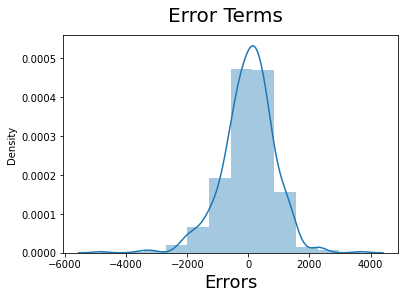

In [75]:
fig = plt.figure()
sns.distplot((residuals), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label

- As the error terms are normally distributed, our assumption has been validated.

### Predicting on test set

In [76]:
var_list = ['atemp', 'hum', 'windspeed']

X_test[var_list] = scaler.transform(X_test[var_list])

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [77]:
X_train.columns

Index(['const', 'workingday', 'windspeed', 'season_spring', 'season_summer',
       'yr_2019', 'mnth_dec', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_sept', 'weekday_saturday', 'weathersit_light_rain_or_snow',
       'weathersit_partly_cloudy'],
      dtype='object')

In [78]:
X_test_new = X_test.loc[:,['workingday', 'windspeed', 'season_spring', 'season_summer',
       'yr_2019', 'mnth_dec', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_sept', 'weekday_saturday', 'weathersit_light_rain_or_snow',
       'weathersit_partly_cloudy']]

In [79]:
X_test_new = sm.add_constant(X_test_new)

C:\Users\sagar.ambalam\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
y_pred = lm.predict(X_test_new)

In [81]:
r2_score(y_test,y_pred)

0.7765771554327958

---------------

### Final Model Summary

In [82]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     166.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.70e-190
Time:                        21:48:45   Log-Likelihood:                -4757.1
No. Observations:                 582   AIC:                             9544.
Df Residuals:                     567   BIC:                             9610.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3934.7412    146.969     26.773      0.000    3646.071    4223.411
workingday                      405.0092     96.505      4.197      0.000     215.459     594.560
windspeed                     -1012.7778    181.150     -5.591      0.000   -1368.584    -656.971
season_spring                 -2613.3511    102.740    -25.437      0.000   -2815.148   -2411.554
season_summer                  -745.0907    119.744     -6.222      0.000    -980.287    -509.894
yr_2019                        2137.8599     72.682     29.414      0.000    1995.102    2280.618
mnth_dec                       -838.5908    135.023     -6.211      0.000   -1103.796    -573.385
mnth_june                       759.7351    151.109      5.028      0.000     462.933    1056.538
mnth_mar                        468.7058    141.304      3.317      0.001     191.163     746.249
mnth_may                        787.1163    161.305      4.880      0.000     470.287    1103.945
mnth_nov                      -1025.3291    141.667     -7.238      0.000   -1303.586    -747.072
mnth_sept                       556.3704    147.079      3.783      0.000     267.484     845.256
weekday_saturday                473.2037    128.615      3.679      0.000     220.584     725.823
weathersit_light_rain_or_snow -1963.5569    238.594     -8.230      0.000   -2432.194   -1494.920
weathersit_partly_cloudy        736.8901     77.798      9.472      0.000     584.083     889.697
==============================================================================
Omnibus:                       75.145   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.068
Skew:                          -0.597   Prob(JB):                     3.32e-52
Kurtosis:                       5.890   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Metrics
- Training R-squared: 0.80
<br>
- Testing R-squared: 0.776

## Equation of best fit line
Below is the mapping considered:
<br>
month = 1-Jan, 2-Feb, 3-Mar...
<br></br>
weekday = 0-Sunday, 1-Monday, 2-Tuesday.. 
<br></br>
Based on the above mapping, below is the equation of the best fit line:<br>
cnt(Counts) = 3934.7412 + 405.0092 * workingday + (-1012.7777) * windspeed + (-2613.3511) * season_spring + (-745.0907) * season_summer + 2137.8599 * yr + (-838.5908) * mnth_dec + 759.7351 * mnth_june + 468.7058 * mnth_mar + 787.1163 * mnth_may + (-1025.3291) * mnth_nov + 556.3704 * mnth_sept + 473.2037 * weekday_saturday + (-1963.5569) * weathersit_light_rain_or_snow + 736.8901 * weathersit_partly_cloudy

## Top Variables contributing to the demand
<br>

- Spring Season
- Year
- Weather being light rain or light snow
- Windspeed
- Month of December